# Assignment 03: Regression, Learning Curves and Regularization

**Due Date:** Friday 10/02/2020 (by 5pm)


**Please fill these in before submitting, just in case I accidentally mix up file names while grading**:

Name: Minji Kim

CWID-5: 50251681

## Introduction 

In this exercise we will be using what you have learned about linear regression, polynomial regression and
regularization, to explore an artificial dataset.

I have generated a secret dataset.  The dataset uses a polynomial combination of a single parameter.
The unknown function is no less than degree 3, but no more than a degree 15 polynomial.  And some random
noise has also been added into the function, so that fitting it is not a completely trivial or obvious
exercise.  Since the dataset is generated from a polynomial function, the output labels `y` are
real valued numbers.  And thus you will be performing a regression fitting task in this assignment.

Your task, should you choose to accept it, is to load and explore the data from this function.  Your ultimate
goal is to try your best to determine the degree of the polynomial used, and the values of the parameters
then used in the secret function.  Because of the noise added to the data you are given, you will not be able
to exactly recover the parameters used to generate the artificial data.  You will even find that determining the
exact degree of the generating polynomial function is not possible.  How you apply polynomial fitting and 
regularization techniques can give different and better or worse approximations of the true underlying function.

In the below cells, I give instructions for the tasks you should attempt.  You will need to load the data and
visualize it to begin with.  Then you will be asked to apply polynomial fitting and regularization in an attempt
to fit the data.  But ultimately, at the end, you will be asked to take what you have discovered, and try and
give your best answer for the polynomial degree and best fitted polynomial parameters for this unknown data set.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# By convention, we often just import the specific classes/functions
# from scikit-learn we will need to train a model and perform prediction.
# Here we include all of the classes and functions you should need for this
# assignment from the sklearn library, but there could be other methods you might
# want to try or would be useful to the way you approach the problem, so feel free
# to import others you might need or want to try
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# notebook wide settings to make plots more readable and visually better to understand
np.set_printoptions(suppress=True)

In [2]:
# notebook wide settings to make plots more readable and visually better to understand
np.set_printoptions(suppress=True)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('figure', titlesize=18)
plt.rc('legend', fontsize=14)
plt.rcParams['figure.figsize'] = (12.0, 8.0) # default figure size if not specified in plot
plt.style.use('seaborn-darkgrid')

## Part 1: Load Data, Explore and Visualize
------------

You have been given a set of 100 (artificial) data points in the file named `assg-03-data.csv` in our 
data subdirectory.  Start by loading this file into a pandas dataframe.  Explore the data a bit.  
Use the `describe()` function to get a sense of the number of values (there should be `m=100` samples),
and their mean and variance.  There are 2 columns, where `x` is the feature, and `y` is the function
value, or in other words the label we will use for the regression fitting task.  What is the range of
the `x` features?  What is the range of the `y` output label here?

Also plot a scatter plot of the data to get a sense of the function shape.  Does it appear linear
or nonlinear?

In [3]:
# load and explore the data.  Use describe and other functions
df = pd.read_csv('../data/assg-03-data.csv')
display(df.describe())
display(df.head())

,x,y
count,100.000000,100.000000
mean,-0.113312,6.296933
std,0.561391,1.858545
min,-0.999466,3.631172
25%,-0.558702,4.470696
50%,-0.175240,6.330139
75%,0.389690,7.915688
max,0.952626,9.651741


,x,y
0,-0.771794,9.325598
1,-0.316835,6.440345
2,-0.450491,7.974504
3,-0.474707,7.807837
4,-0.460465,7.822186


In [4]:
# minimal data cleaning / preparation is needed, but if you load using pandas you will have to split out the x input column separate from the y output labels.
X = df.x.values
y = df.y.values

print('x shape:', X.shape)
print('y shape:', y.shape)

x shape: (100,)
y shape: (100,)


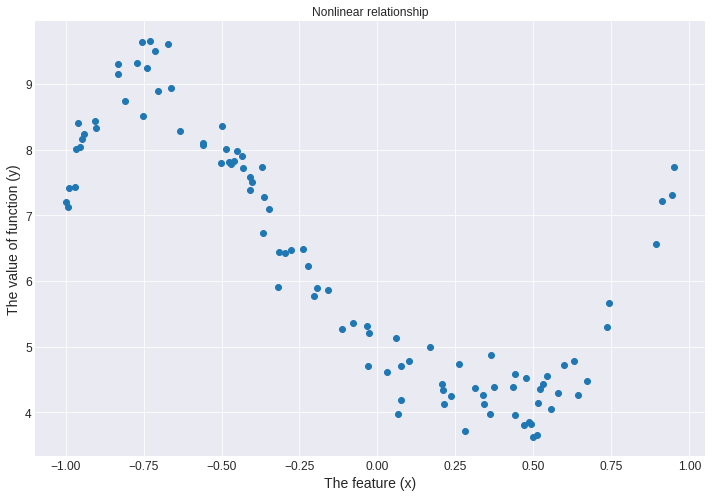

In [5]:
# visualize the data we loaded using a simple scatter plot
plt.scatter(X, y)
plt.title('Nonlinear relationship')
plt.xlabel('The feature (x)')
plt.ylabel('The value of function (y)');

## Part 2: Create an Overfit Model

You have been told the degree of the polynomial function governing the data you just loaded is somehwere
between 3 and 15.  Lets start by overfitting a degree 20 polynomial regression to the data.
In the next cells, use `PolynomialFeatures` and scikit-learn `LinearRegression()` to create a best fit
degree 20 polynomial model of the data.

In [6]:
# overfit with a degree 20 polynomial, display cross validation of fit
# no regularization

# create all degree 20 combination features 
poly_features = PolynomialFeatures(degree=20, include_bias=False)

# sklearn expects a column matrix instead of a vector
X = X.reshape(-1, 1)

# create the degree 20 polynomial feature
X_poly = poly_features.fit_transform(X)

# show the shape of X and X_poly
print('X shape:', X.shape)
print('X_poly shape:', X_poly.shape)

# show the first 5 values of X and of X_poly
print('X:', X[:5,:])
print('X_poly:', X_poly[:5,:])

# fit a polynomial regression of degree 20
deg20_reg = LinearRegression()
deg20_reg.fit(X_poly, y)

# display cross validation of fit
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(deg20_reg, X_poly, y, cv = 10, scoring = "neg_mean_squared_error")
print('mean_MSE', np.mean(cross_val))

X shape: (100, 1)
X_poly shape: (100, 20)
X: [[-0.77179438]
 [-0.31683489]
 [-0.4504911 ]
 [-0.47470737]
 [-0.46046463]]
X_poly: [[-0.77179438  0.59566656 -0.4597321   0.35481865 -0.27384704  0.2113536
  -0.16312152  0.12589627 -0.09716604  0.0749922  -0.05787856  0.04467035
  -0.03447632  0.02660863 -0.02053639  0.01584987 -0.01223284  0.00944124
  -0.00728669  0.00562383]
 [-0.31683489  0.10038435 -0.03180526  0.01007702 -0.00319275  0.00101157
  -0.0003205   0.00010155 -0.00003217  0.00001019 -0.00000323  0.00000102
  -0.00000032  0.0000001  -0.00000003  0.00000001 -0.          0.
  -0.          0.        ]
 [-0.4504911   0.20294223 -0.09142367  0.04118555 -0.01855372  0.00835829
  -0.00376533  0.00169625 -0.00076415  0.00034424 -0.00015508  0.00006986
  -0.00003147  0.00001418 -0.00000639  0.00000288 -0.0000013   0.00000058
  -0.00000026  0.00000012]
 [-0.47470737  0.22534708 -0.10697392  0.05078131 -0.02410626  0.01144342
  -0.00543228  0.00257874 -0.00122415  0.00058111 -0.000275

In the next cell, use introspection of your fitted model to display the intercept and fitted coefficient parameters.
Also discover the overall $R^2$ score of the fit.  Display them here for future reference.

You should of course get a single intercept parameter, but 20 fitted theta coefficients.  Is there anything
you think you can learn looking at the coefficients for this degree 20 fit?  For example, knowing that
the true degree is less than 20 for the underlying function, do you have any guess at this point of what
degree the polynomial might be that underlies this data?

You should discover you get a pretty good $R^2$ score here, probably above 0.96.  This indicates a good
fit that explains a lot of the variance seen.  But since we have a very high degree model, you should
be worried at this point that at least some of that performance is coming from overfitting to the noise
present in the data instead of the true function that underlies the data.

In [7]:
# display the intercept and coefficients of the fit as well as the R^2 score here
# display the intercept and coefficients
print('intercept:',deg20_reg.intercept_)
print('coefficients:', deg20_reg.coef_)

# predict X_poly
y_pred = deg20_reg.predict(X_poly)

# display R^2 score
from sklearn.metrics import r2_score
print('R^2 score:', r2_score(y_pred, y))

intercept: 4.86059074874491
coefficients: [     -4.95335555      14.95747017      45.59601441    -304.30195837
    -487.48545956    4220.71227198    1403.57864768  -30227.82753856
    4633.06416285  122824.02884402  -38762.00029791 -301427.75696398
  101333.25375662  457059.5816199  -131399.40744444 -419685.69127424
   85548.96405485  214140.45366271  -22318.46562652  -46619.83284736]
R^2 score: 0.9735331321524635


And finally for this part, visualize the fit from this degree 20 model.  Plot the raw data as a scatter
plot again, and then use the `predict()` function to visualize the predictions made by the degree 20
polynomial.

Any insights from this visualization?  Do you see evidence of the type of extreme overfitting that we
saw in the lectures? Especially around the ends of the data?

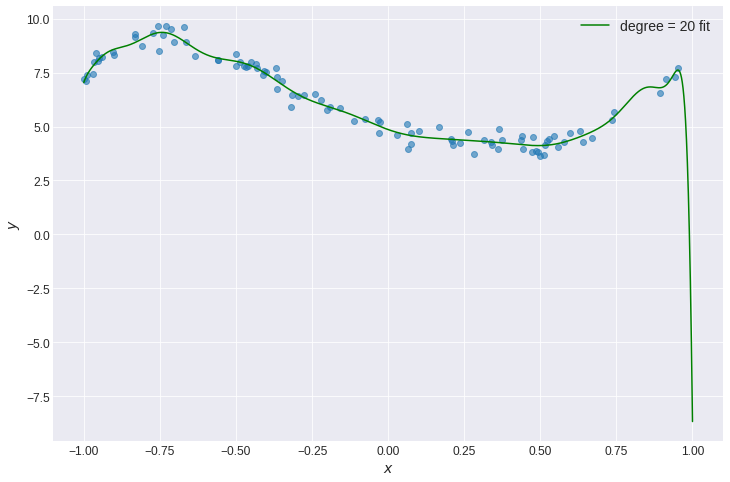

In [8]:
# visualize the fit of the degree 20 polynomial here.  Start by plotting the raw data as a scatter plot

# first show the original quadratic noisy data points
plt.scatter(X, y, alpha = 0.6);

# then display the fitted model using the predict() member function
# display the degree 20 fit model, to see the true curve you need a much
# higher mesh resolution here
x_h = np.linspace(-1.0, 1.0, 10000).reshape(10000,1)
x_h_deg20 = poly_features.fit_transform(x_h)
yhat_deg20 = deg20_reg.predict(x_h_deg20)
plt.plot(x_h, yhat_deg20, 'g-', label=r'degree = 20 fit')

# label the figure
plt.xlabel(r'$x$')
plt.ylabel('$y$')
plt.legend();

## Part 3: Cross Validation of Degree 20 Model
------------------------------------------

In these next parts of the assignment, we will walk you through applying regularization and using cross validation
on your degree 20 model to try and discover a model that is not overfitting the noise
present in the data set.  This will hopefully lead to better insights on the true nature of the
function that may be generating the data you are analyzing.

First of, for convenience, we recreate the `plot_learning_curves()` function from our textbook for
our use in this part of the assignment.  Recall that this function, if you give it a 
scikit-learn `Pipeline()` model, and the `X` input data and `y` labels, will perform
a series of cross validation trainings using the model and plot the results.  In this case, the
function trains the model with a single input, then 2 inputs, and so on, and displays the
resulting model predictions on the data it trained with, and on the held back validation data.
As discussed in our lectures, these learning curves can help us determine whether a model is overfitting or
underfitting, and what performance we can expect from a properly powerful trained and fitted model.

In [9]:
def plot_learning_curves(model, X, y):
    """Plot learning curves obtained with training the given scikit-learn model
    with progressively larger amounts of the training data X.
    
    Nothing is returned explicitly from this function, but a plot will be created
    and the resulting learning curves displayed on the plot.
    
    Parameters
    ----------
    model - A scikit-learn estimator model to be trained and evaluated.
    X - The input training data
    y - The target labels for training
    """
    # we actually split out 20% of the data solely for validation, we train on the other 80%
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    
    # keep track of history of the training and validation cost / error function
    train_errors, val_errors = [], []
    
    # train on 1 to m of the data, up to all of the data in the split off training set
    for m in range (1, len(X_train)):
        # fit/train model on the first m samples of the data
        model.fit(X_train[:m], y_train[:m])
        
        # get model predictions
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        
        # determine RMSE errors and save history for plotting
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    # plot the resulting learning curve
    plt.plot(np.sqrt(train_errors), 'r-', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=2, label='val')
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.legend(fontsize=18)

Using the above function, display the learning curve for a degree 20 polynomial.  If you didn't do 
already, you will need a scikit-learn `Pipeline` here that first applies a `PolynomialFeatures` transformation
to get a degree 20 set of input features, and then performs linear regression on the pipeline after
creating the polynomial features.

Use your pipeline transform/fit model to call the `plot_learning_curves()` function and display the
learning curves for a degree 20 polynomial, that remember we should suspect is overfitting the
data at this point.

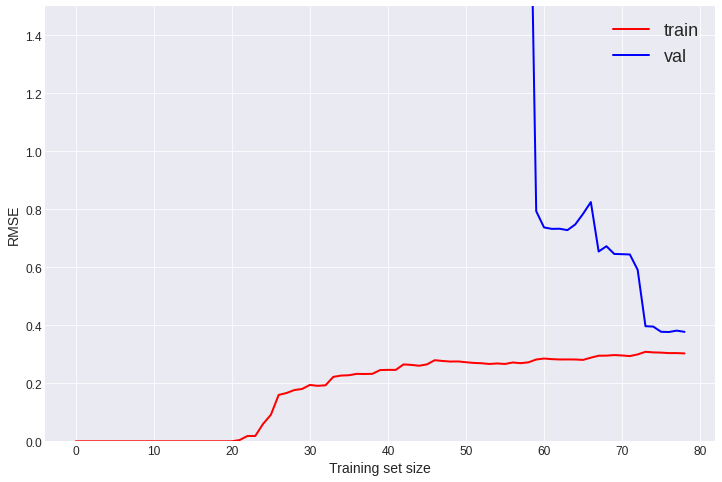

In [10]:
# create a pipeline here if needed for a degree 20 set of PolynomialFeatures that is then
# trained with a standard LinearRegression
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=20, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

# plot the learning curves.  You may need to change the limits of your plot, because if the data is overfitting
plot_learning_curves(polynomial_regression, X, y)
plt.ylim(0, 1.5);

You can and will get different results when you plot the learning curve here because the train/validation
split is done randomly each time.  So you should probably run the above plot of your learning curves
more than 1 time, to get a feel for what results you can get.

But you should observe 2 important points here

1. Does it seem like the model is overfitting?  e.g. Are you observing that often there is a very big gap in
performance between the validation and training RMSE measure, where validation RMSE is very bad compared to 
what is seen with the data model was trained with.
2. You should make a note of what performance is reached on the training data RMSE measure with this overfit
model.  This level of RMSE for training can probably be approached with a properly tuned model that
generalizes well, and can thus get this performance on data it has not seen before.

You might want to display the intercept, coefficients and $R^2$ score again here of the model you fit,
just to confirm they are similiar to what you saw the first time.  But if you are using a pipeline, you
may need to access these parameters in a slightly different way now.

In [11]:
# display the intercept and coefficients of the fit as well as the R^2 score here
print('intercept:',polynomial_regression['lin_reg'].intercept_)
print('coefficients:', polynomial_regression['lin_reg'].coef_)

y_predict = polynomial_regression.predict(X)

from sklearn.metrics import r2_score
print('r^2 score:', r2_score(y_predict, y))

from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(polynomial_regression, X, y, cv = 10, scoring = "neg_mean_squared_error")
print(cross_val)
print('mean_MSE', np.mean(cross_val))

intercept: 4.868984420538567
coefficients: [     -4.47171413      16.97290732      -7.00891455    -395.45952598
     906.27534302    6067.98758388  -13523.91235976  -48163.39395631
   86351.47877033  216641.36551348 -292762.74974879 -586091.95974035
  567493.6838119   972341.5235215  -630785.95733326 -967077.95758912
  373880.28586578  528464.05467782  -91569.84593296 -121823.33811902]
r^2 score: 0.9696734877074117
[  -0.04835187   -1.94876704 -917.67211476   -0.18803868   -0.21512884
   -0.07710348   -0.09567604   -0.26017291   -0.08442758   -0.16782539]
mean_MSE -92.0757606607887


## Part 4: Applying Ridge Regularization
---------------------

In this section you will be asked to perform some of the regularization techniques we discussed in our
lectures on linear regression and regularization.  The goal here is to try and get a better idea of what the
true degree of the governing function might be, as well as the values of the coefficients of this function.

Lets start by trying a simple "ridge" regularization.  Recall ridge regression applies $\ell_2$ penalities
(e.g. it adds in the square of the coefficient $\theta_i^2$) which tends to reduce (but not eliminate)
parameters that are not necessary for minimizing the fitness function.

As before, create a pipeline that creates degree 20 polynomial features.  But apply and fit a ridge
regression for this part of the assignment.  Try and explore alpha values to get a good model.
A "good" model is one here that shows you are no longer overfitting.  You can tell you are no longer
overfitting if there is no longer a big gap between training and validation performance.  Also you should compare
the validation RMSE here to that achieved on the training data previously.  If your validation RMSE here 
is approaching that seen on only the training data before, the generalization of this fitted model
with regularization is doing well.

In [12]:
# search the best alpha
from sklearn.model_selection import GridSearchCV
X_p = PolynomialFeatures(20).fit_transform(X.reshape(-1,1))

alphas = np.logspace(-4, -1, 1000)

parameters = {'alpha':alphas}
ridge = Ridge(solver='svd', random_state = 0)
ridge_gridcv = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv = 5)
ridge_gridcv.fit(X_p, y)
best_alpha = ridge_gridcv.best_params_['alpha']
print(ridge_gridcv.best_params_)
print(ridge_gridcv.best_score_)

# another way to search the best alpha
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', cv = 5)
ridgecv.fit(X_p, y)
print('alpha:', ridgecv.alpha_)

{'alpha': 0.009593608287093146}
-0.11091456437182245
alpha: 0.009593608287093146


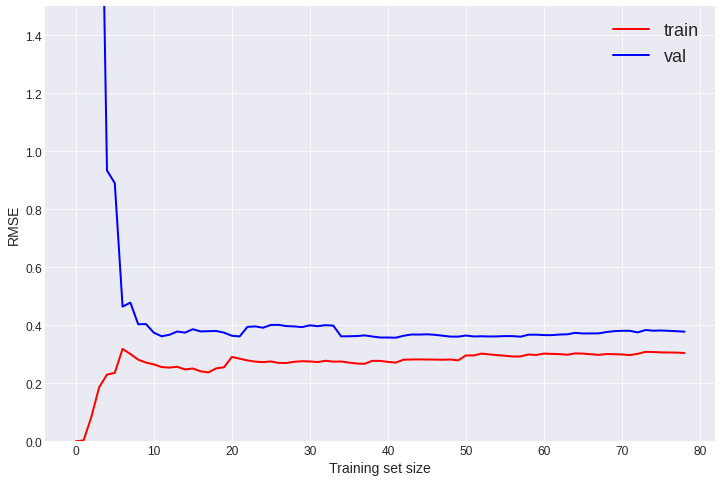

In [13]:
# apply l2 "ridge" regularization to a degree 20 set of polynomial features
ridge_good = Pipeline([
    ('poly_features', PolynomialFeatures(degree=20, include_bias=False)),
    ('ridge_reg', Ridge(alpha= best_alpha, solver='svd')),
])

# plot the learning curves you observe for a good example of a ridge regularization fit
plot_learning_curves(ridge_good, X, y)
plt.ylim(0, 1.5);

When you think you have a relatively good alpha parameter for your ridge regression, display the
intercept, coefficients and $R^2$ score of you fitted model here for future reference.  Compare the
coefficients here to the previous overfitted model.  Do you have any insights on the degree of the
underlying polynomial from looking at your coefficients here?

In [14]:
# display intercept, coefficients and R^2 fit score here
print('intercept:',ridge_good['ridge_reg'].intercept_)
print('coefficients:', ridge_good['ridge_reg'].coef_)

y_preds = ridge_good.predict(X)

from sklearn.metrics import r2_score
print('r^2 score:', r2_score(y_preds, y))

from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(ridge_good, X, y, cv = 10, scoring = "neg_mean_squared_error")
print(cross_val)
print('mean_MSE', np.mean(cross_val))

intercept: 4.954657674889136
coefficients: [-4.18905689  4.6070013   0.77600979 -0.8244676   2.62046638 -0.16783539
  1.74299715 -0.06901097  0.62693446 -0.12119026 -0.1084601  -0.12791562
 -0.44993808 -0.11951661 -0.49573871 -0.15579786 -0.33858404 -0.27054506
 -0.04760701 -0.47128516]
r^2 score: 0.9687276300453963
[-0.05370892 -0.1499802  -0.07515323 -0.11179739 -0.19581737 -0.04757588
 -0.09904883 -0.15340729 -0.09911895 -0.14802862]
mean_MSE -0.1133636671467066


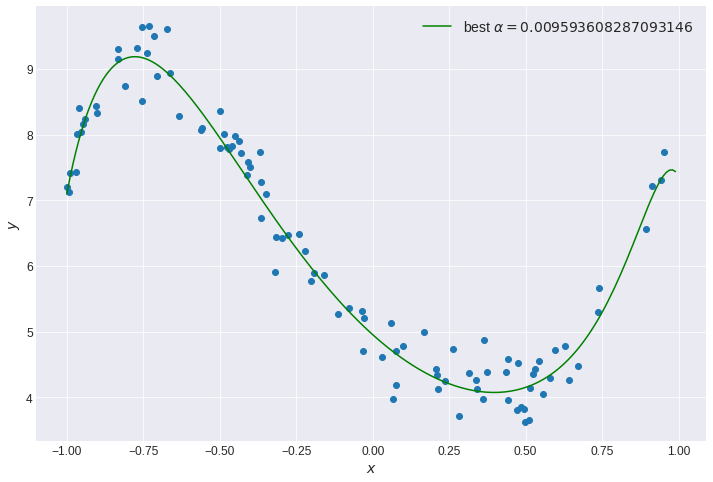

In [15]:
# display the fitted model
plt.scatter(X, y);
x_h = np.arange(-1, 1, .01).reshape(-1,1)
y_h = ridge_good.predict(x_h)
plt.plot(x_h, y_h, 'g-', label=r'best $\alpha = {}$'.format(best_alpha))

# # add labels and info to plot
plt.xlabel(r'$x$')
plt.ylabel('$y$')
plt.legend();

## Part 5: Applying Lasso Regularization
-----------------------

In this part of the assignment we will next apply lasso regression. Recall that lasso regression is
the same as $\ell_1$ norm penality, which in practical terms means we use the absolute value of
the coefficient in our regularization penalty term.

As before, create a pipeline that creates degree 20 polynomial features.  But apply and fit a lasso
regression for this part of the assignment.  You should explore `alpha` values around 0.001 to
0.05 or so.  You may get warnings with this fit, try setting the tolerance parameter `tol` to 
0.1 here, and maybe increasing `max_iter` as well, though it is not nesessary to completely eliminate
warnings to still get a relatively good fit here.  And actually you may want to explore higher values
of `alpha`, as the higher you go, the more pressure on the fitted model to eliminate terms.  This may give
you better insights into the true degree of the underlying polynomial function used to generate the
data here.

Once you have a good example, use your best fitted model to display the learning curves using 
the lasso regularization.

Try and determine an `alpha` parameter that you think is working well here for the regularization.  You are
doing "well" here if your learning curves indicate you are not ovrefitting, and you are approaching
RMSE performance on your validation data somewhere around where training RMSE achieved in previous
overfitting model.  And you are doing well if you maybe have some idea of the cutoff that looks likely for
the true degree of the underlying function you are attempting to model.

{'alpha': 0.0001}
0.9450819748431323


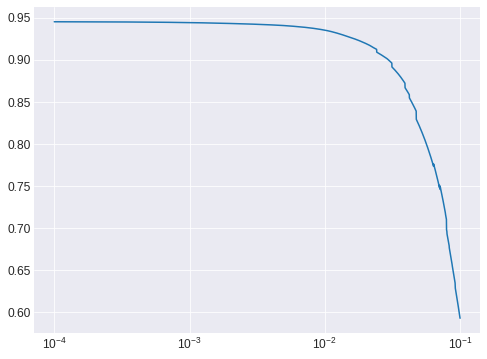

In [16]:
from sklearn.linear_model import LassoCV

lasso = Lasso(random_state = 0, max_iter=100000, tol = 0.1)
alphas = np.logspace(-4, -1, 10000)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X_p, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)
best_param = clf.best_params_['alpha']
print(clf.best_params_)
print(clf.best_score_)

/opt/anaconda3/envs/python3-datasci/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)


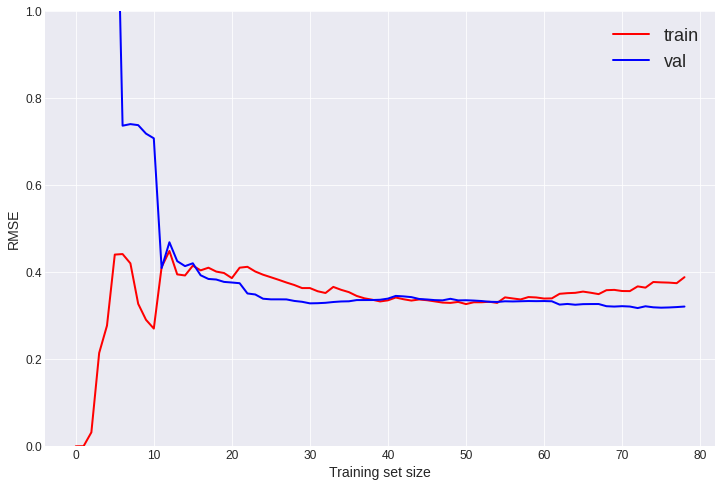

In [17]:
# apply l1 "lasso" regularization, to try and make unused terms drop out
lasso_good = Pipeline([
    ('poly_features', PolynomialFeatures(degree=20, include_bias=False)),
    ('lasso_reg', Lasso(alpha= best_param, tol = 0.1, max_iter = 100000)),
])

# plot the learning curves you observe for a good example of a lasso regularization fit
plot_learning_curves(lasso_good, X, y)
plt.ylim(0, 1.0);

When you think you have found relatively good `alpha` and other parameters, display the intercept, coefficients
and $R^2$ scores again for this fitted model using lasso regularization.  Any observations about
the coefficients now?  Compare them to the degree 20 model with no regularization.  You may be able to 
start getting some ideas on the true degree of the polynomial from the results here.

In [18]:
# display intercept, coefficients and R^2 fit score here
print('intercept:',lasso_good['lasso_reg'].intercept_)
print('coefficients:', lasso_good['lasso_reg'].coef_)

y_preds = lasso_good.predict(X)

from sklearn.metrics import r2_score
print('r^2 score:', r2_score(y_preds, y))

from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(lasso_good, X, y, cv = 10, scoring = "neg_mean_squared_error")
print(cross_val)
print('mean_MSE', np.mean(cross_val))

intercept: 5.276421745686132
coefficients: [-4.39366188  2.8771184   2.58247111  0.42295235  1.16859401  0.01512398
  0.59454889 -0.10898407  0.32187457 -0.13433992  0.18582518 -0.13259104
  0.11040021 -0.11791862  0.0697225  -0.10206414  0.04673228 -0.0884522
  0.03316863 -0.07759825]
r^2 score: 0.9504199775235755
[-0.08607713 -0.17685464 -0.15084061 -0.11748805 -0.31657822 -0.08571973
 -0.19476865 -0.08077406 -0.16944109 -0.23253266]
mean_MSE -0.1611074837613259


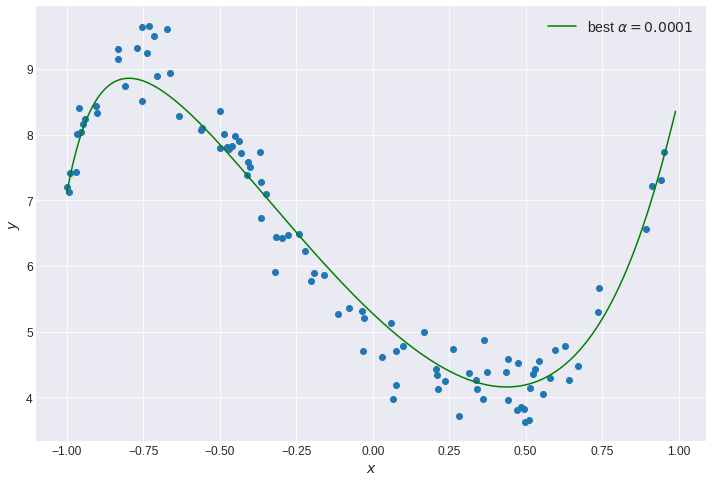

In [19]:
# display the fitted model
plt.scatter(X, y);
x_h = np.arange(-1, 1, .01).reshape(-1,1)
y_h = lasso_good.predict(x_h)
plt.plot(x_h, y_h, 'g-', label=r'best $\alpha = {}$'.format(best_param))

# # add labels and info to plot
plt.xlabel(r'$x$')
plt.ylabel('$y$')
plt.legend();

## Part 6: Give me Your Best Model Estimate

Taking what you have observed from the previous parts 3-5 of the assignment, try and give you best guess/estimate
for the true degree of the underlying polynomial.  Your lasso regularization results might be most useful
for this determination, try finding values of `alpha` that are obviously too big (maybe by watching your
$R^2$) score), and then reduce this a bit to get an estimate on the upper bound of the number of terms in
the true polynomial.  Recall that because of noise you won't be able to get a perfect answer here.  Also it
helps to know, especially for even powers of the polynomial, that coefficients here are often only
reflecting lower even power effects.  So for example, for a true function with only a $x^2$ term, you might
still get $x^4$ and $x^8$ coefficients using lasso regression, even with relatively high values of `alpha`.

In any case, choose your best estimate of the "true" degree of the underlying polynomial function.  Then train
a final linear regression with no or maybe slight $\ell_2$ regularization to try and get a best estimate
of the true model coefficients.  You should do a little bit of testing again using the learning curves
and checking your $R^2$ fit score to determine that the model appears to be able to fit as well as
your degree 20 models with regularization.  But then train a final model using all of the data, and report
the intercept, coefficients and $R^2$ fit you achieve with your best estimated model for this assignment.

In [20]:
# estimate the polynomial degree and create your best model.  You might want to try first with no regularization,
# and then maybe with a little bit of l-2 (ridge) regulariztion and compare.

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(100)}
grid = GridSearchCV(PolynomialRegression(), param_grid, scoring='neg_mean_squared_error', cv = 5)
grid.fit(X, y)

print(grid.best_params_)

best_degree = grid.best_params_['polynomialfeatures__degree']
poly_base = grid.best_estimator_

# you should confirm that you model does not overfit and performs as well as your degree 20 models with
# regularization
# display cross validation of fit

from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(poly_base, X, y, cv = 10, scoring = "neg_mean_squared_error")
print(cross_val)
print('mean_MSE', np.mean(cross_val))

y_preds = poly_base.predict(X)

from sklearn.metrics import r2_score
print('r^2 score:', r2_score(y_preds, y))

{'polynomialfeatures__degree': 5}
[-0.05366324 -0.13144781 -0.07364466 -0.11317103 -0.18046498 -0.04664093
 -0.09550128 -0.15861545 -0.09743935 -0.14582432]
mean_MSE -0.10964130736054337
r^2 score: 0.9699327442072615


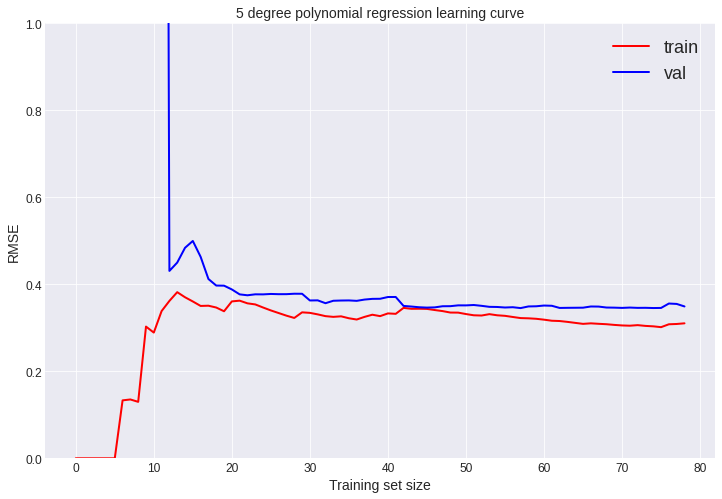

In [21]:
# display learning curve for poly_Base
plot_learning_curves(poly_base, X, y)
plt.title('{} degree polynomial regression learning curve'.format(best_degree), size = 14)
plt.ylim(0, 1.0);

In [22]:
X_p5 = PolynomialFeatures(best_degree).fit_transform(X.reshape(-1,1))

alphas = np.logspace(-4, -1, 1000)

parameters = {'alpha':alphas}
ridge = Ridge(solver='svd')
ridge_grid = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv = 5)
ridge_grid.fit(X_p5, y)
best_alpha = ridge_grid.best_params_['alpha']
print(ridge_grid.best_params_)
print(ridge_grid.best_score_)

{'alpha': 0.005329994080844093}
-0.10763784077842735


Once you settle on your best model, do a final trainin of it with all of the data.  Display
your intercept, coefficients and $R^2$ fit score for this best model.

Then, visualize the fit of your best model.  Once again scatter plot the raw data.  Then using the
`predict()` function from you scikit-learn model, show the predicted regression as a line on top of the
raw data points.

In [23]:
# perform one final fit of our best performing estimated model on all the data
poly_good = Pipeline([
    ('poly_features', PolynomialFeatures(degree=best_degree, include_bias=False)),
    ('ridge_reg', Ridge(alpha= best_alpha, solver='svd')),
])

# fit on all the data
poly_good.fit(X, y)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('ridge_reg', Ridge(alpha=0.005329994080844093, solver='svd'))])

In [24]:
# display intercept, coefficients and R^2 fit score here
print('intercept:',poly_good['ridge_reg'].intercept_)
print('coefficients:', poly_good['ridge_reg'].coef_)

y_preds = poly_good.predict(X)

from sklearn.metrics import r2_score
print('r^2 score:', r2_score(y_preds, y))

from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(poly_good, X, y, cv = 10, scoring = "neg_mean_squared_error")
print(cross_val)
print('mean_MSE', np.mean(cross_val))

intercept: 4.943417484480895
coefficients: [-4.04498027  5.35723278 -0.49115412 -2.37151155  5.24415967]
r^2 score: 0.9698387968204332
[-0.05434888 -0.13149848 -0.07319601 -0.10823222 -0.18205235 -0.04700484
 -0.09713809 -0.15567081 -0.09815746 -0.14820732]
mean_MSE -0.10955064536075491


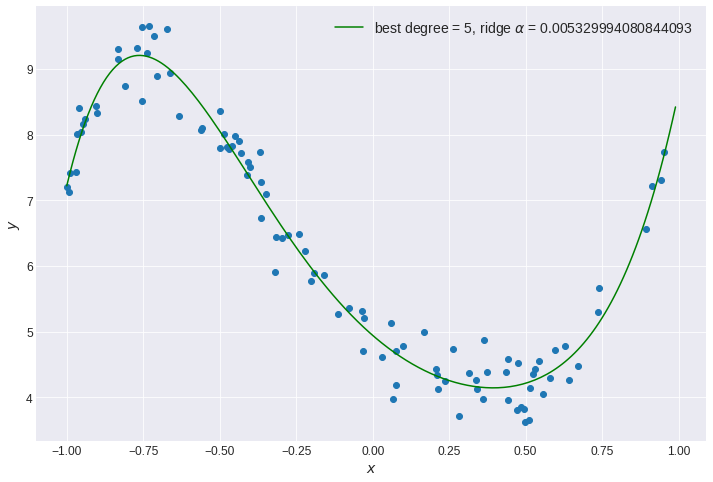

In [25]:
# visualize the fit, start with the raw data points we are fitting
plt.scatter(X, y);

# display the best model  fit
x_h = np.arange(-1, 1, .01).reshape(-1,1)
y_h = poly_good.predict(x_h)
plt.plot(x_h, y_h, 'g-', label=r'best degree = {}, ridge $\alpha$ = {}'.format(best_degree, best_alpha))

# # add labels and info to plot
plt.xlabel(r'$x$')
plt.ylabel('$y$')
plt.legend();